In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
flight = pd.read_csv('flight.csv')

In [ ]:
flight.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


### Data Preprocessing

In [ ]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
data_missing_value = flight.isna().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(flight))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.16
1,WORK_CITY,2269,3.60
2,SUM_YR_1,551,0.87
3,AGE,420,0.67
4,SUM_YR_2,138,0.22
5,WORK_COUNTRY,26,0.04


In [ ]:
flight.duplicated().sum()

0

In [ ]:
flight.replace('.', np.nan, inplace=True)

In [ ]:
flight

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,NaN,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,NaN,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


In [ ]:
con_1 = flight['SUM_YR_1'].isna()
con_2 = flight['SUM_YR_1'] == 0
con_3 = flight['SUM_YR_2'].isna()
con_4 = flight['SUM_YR_2'] == 0

con_sumy = flight[~(con_1 & con_4)]

sumy_analysis = con_sumy

sumy_analysis

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,NaN,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,NaN,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62982,16415,1/20/2013,1/20/2013,Female,4,beijing,NaN,CN,35.0,3/31/2014,...,0.0,3848,1/20/2013,437,0.000000,0,0,0.000000,0,0
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0


In [ ]:
sumy_analysis = sumy_analysis[~(con_2 & con_4)]

sumy_analysis

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,NaN,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,NaN,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,5/8/2005,8/26/2005,Male,4,NaN,NaN,CN,34.0,3/31/2014,...,960.0,368,1/3/2014,89,70.000000,70,0,0.710000,900,1
62975,30765,11/16/2008,11/30/2013,Male,4,TAIPEI,NaN,TW,38.0,3/31/2014,...,910.0,368,12/2/2013,121,2.000000,2,0,0.670000,400,0
62976,10380,7/8/2010,6/21/2011,Male,4,guiyangshi,guizhousheng,CN,33.0,3/31/2014,...,0.0,1062,2/22/2014,39,420.000000,420,1,0.225000,213,1
62977,16372,12/20/2012,12/20/2012,Male,4,taoyuan,NaN,TW,47.0,3/31/2014,...,0.0,904,12/24/2012,464,4.000000,4,0,0.250000,0,0


In [ ]:
sumy_analysis = sumy_analysis[~con_3]

sumy_analysis

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,NaN,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,NaN,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,5/8/2005,8/26/2005,Male,4,NaN,NaN,CN,34.0,3/31/2014,...,960.0,368,1/3/2014,89,70.000000,70,0,0.710000,900,1
62975,30765,11/16/2008,11/30/2013,Male,4,TAIPEI,NaN,TW,38.0,3/31/2014,...,910.0,368,12/2/2013,121,2.000000,2,0,0.670000,400,0
62976,10380,7/8/2010,6/21/2011,Male,4,guiyangshi,guizhousheng,CN,33.0,3/31/2014,...,0.0,1062,2/22/2014,39,420.000000,420,1,0.225000,213,1
62977,16372,12/20/2012,12/20/2012,Male,4,taoyuan,NaN,TW,47.0,3/31/2014,...,0.0,904,12/24/2012,464,4.000000,4,0,0.250000,0,0


In [ ]:
flight = sumy_analysis

Pada analisis yang dilakukan ditemukan bahwa kemungkinan data NaN pada YR_SUM kemungkinan karena penumpang tidak memiliki flight record atau mengambil discount 0% atau menukar point. pada dataset juga diperlihatkan bahwa credit fare(YR_SUM 1 & 2) yg keduanya memiliki angka 0, berdiskon 0  menyebabkan fare yg unreasonable.

In [ ]:
flight

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,NaN,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,NaN,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,5/8/2005,8/26/2005,Male,4,NaN,NaN,CN,34.0,3/31/2014,...,960.0,368,1/3/2014,89,70.000000,70,0,0.710000,900,1
62975,30765,11/16/2008,11/30/2013,Male,4,TAIPEI,NaN,TW,38.0,3/31/2014,...,910.0,368,12/2/2013,121,2.000000,2,0,0.670000,400,0
62976,10380,7/8/2010,6/21/2011,Male,4,guiyangshi,guizhousheng,CN,33.0,3/31/2014,...,0.0,1062,2/22/2014,39,420.000000,420,1,0.225000,213,1
62977,16372,12/20/2012,12/20/2012,Male,4,taoyuan,NaN,TW,47.0,3/31/2014,...,0.0,904,12/24/2012,464,4.000000,4,0,0.250000,0,0


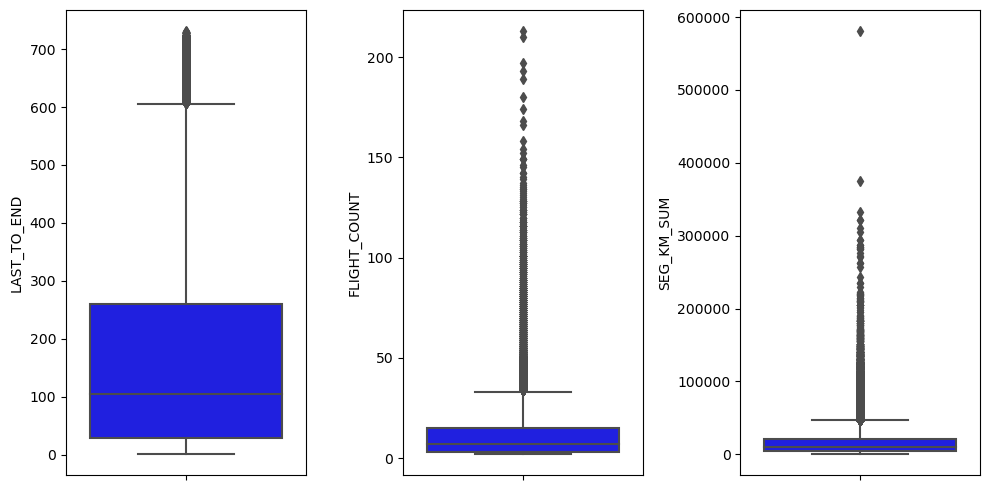

In [ ]:
features = ['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']

plt.figure(figsize=(10,5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y= flight[features[i]], color= 'blue')
    plt.tight_layout()

In [ ]:
RFM = flight[['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']]

In [ ]:
RFM

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,1,210,580717
1,7,140,293678
2,11,135,283712
3,97,23,281336
4,5,152,309928
...,...,...,...
62974,89,2,368
62975,121,2,368
62976,39,2,1062
62977,464,2,904


Saya memakai rfm acuan pada buku dimana R = LAST_TO_END F = FLIGHT_COUNT M = SEG_KM_SUM, dimana pada R adalah Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir, F adalah jumlah penerbangan, dan M adalah total jarak yang sudah dilakukan.

In [ ]:
RFM.isna().sum()

LAST_TO_END     0
FLIGHT_COUNT    0
SEG_KM_SUM      0
dtype: int64

In [ ]:
#outliers flight_count

Q1 = RFM['FLIGHT_COUNT'].quantile(0.25)
Q3 = RFM['FLIGHT_COUNT'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5*IQR
batas_atas = Q3 + 1.5*IQR

In [ ]:
Q1_km = RFM['SEG_KM_SUM'].quantile(0.25)
Q3_km = RFM['SEG_KM_SUM'].quantile(0.75)
IQR_km = Q3_km - Q1_km
batas_bawah_km = Q1_km - 1.5*IQR_km
batas_atas_km = Q3_km + 1.5*IQR_km

In [ ]:
Q1_lte= RFM['LAST_TO_END'].quantile(0.25)
Q3_lte = RFM['LAST_TO_END'].quantile(0.75)
IQR_lte = Q3_lte - Q1_lte
batas_bawah_lte = Q1_lte - 1.5*IQR_lte
batas_atas_lte= Q3_lte + 1.5*IQR_lte

In [ ]:
outliers_bawah = RFM['FLIGHT_COUNT'] < batas_bawah
outliers_atas = RFM['FLIGHT_COUNT'] > batas_atas

outliers = outliers_bawah | outliers_atas
RFM[outliers]

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,1,210,580717
1,7,140,293678
2,11,135,283712
4,5,152,309928
5,79,92,294585
...,...,...,...
21570,20,34,20141
23327,10,47,8648
26283,11,34,9163
34308,35,36,19868


In [ ]:
outliers_bawah_km = RFM['SEG_KM_SUM'] < batas_bawah_km
outliers_atas_km = RFM['SEG_KM_SUM'] > batas_atas_km

outliers_km = outliers_bawah_km | outliers_atas_km
RFM[outliers_km]

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,1,210,580717
1,7,140,293678
2,11,135,283712
3,97,23,281336
4,5,152,309928
...,...,...,...
10180,7,27,51056
10722,8,39,47646
11918,179,21,48474
11954,114,18,54252


In [ ]:
outliers_bawah_lte = RFM['LAST_TO_END'] < batas_bawah_lte
outliers_atas_lte = RFM['LAST_TO_END'] > batas_atas_lte

outliers_lte= outliers_bawah_lte | outliers_atas_lte
RFM[outliers_lte]

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
3890,643,4,38663
4087,624,4,36880
4126,667,3,36696
4129,617,3,36696
5808,660,11,22216
...,...,...,...
62922,664,2,1494
62927,655,2,368
62936,633,2,1357
62954,624,2,368


In [ ]:
outliers_combined = outliers| outliers_km | outliers_lte

RFM_OUT = RFM[~ outliers_combined]

In [ ]:
RFM_OUT

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
1214,217,32,46488
1256,68,25,44870
1296,44,28,43915
1304,4,30,43997
1326,28,33,43164
...,...,...,...
62974,89,2,368
62975,121,2,368
62976,39,2,1062
62977,464,2,904


In [ ]:
RFM_OUT.columns = ['recency', 'frequency', 'monetery']

In [ ]:
RFM_OUT.reset_index(drop=True, inplace=True)

In [ ]:
feats =['recency', 'frequency', 'monetery']

X = RFM_OUT

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
df_scaler = pd.DataFrame(data= X_std, columns= feats)

df_scaler.head()

,recency,frequency,monetery
0,0.306965,3.276326,3.397600
1,-0.621725,2.285868,3.235773
2,-0.771312,2.710350,3.140258
3,-1.020625,2.993338,3.148459
4,-0.871038,3.417820,3.065145


### Modelling

<Axes: >

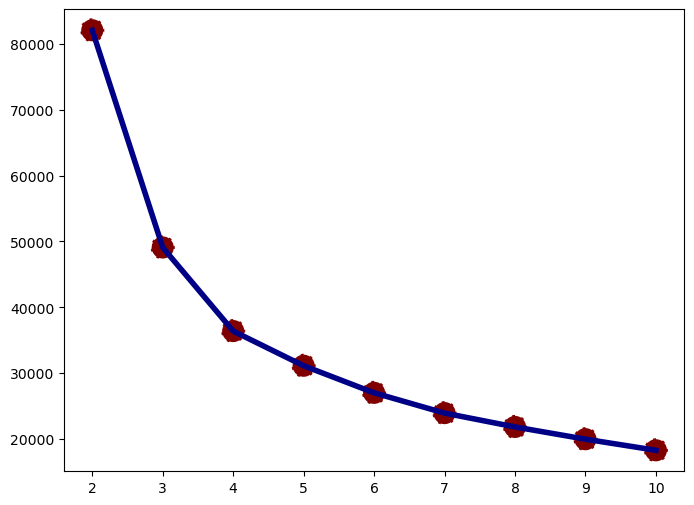

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaler.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))

arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_scaler)
    preds = kmeans.predict(df_scaler)

    score_euclidean = silhouette_score(df_scaler, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

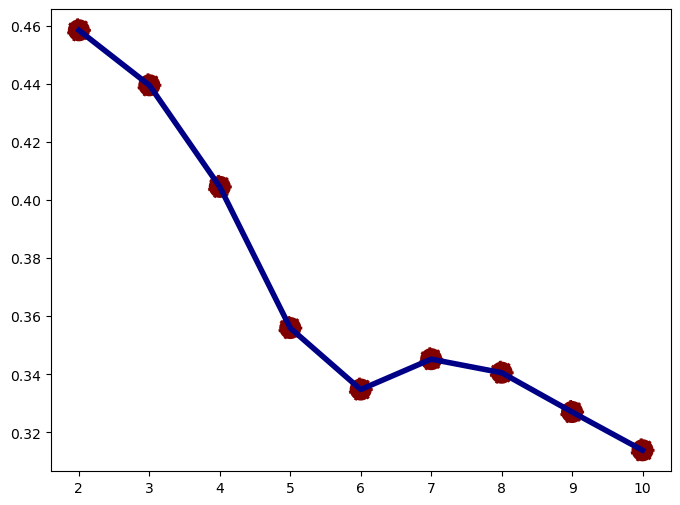

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_scaler.values)

KMeans(n_clusters=4, random_state=0)

In [ ]:
RFM_OUT['clusters'] = kmeans.labels_
RFM_OUT.head()

,recency,frequency,monetery,clusters
0,217,32,46488,3
1,68,25,44870,3
2,44,28,43915,3
3,4,30,43997,3
4,28,33,43164,3


In [ ]:
perc = [0.1,0.2,0.3,00.4,0.5,0.6,0.7,0.8,0.9]
RFM_OUT.describe(percentiles=perc)

,recency,frequency,monetery,clusters
count,54074.000000,54074.000000,54074.000000,54074.000000
mean,167.750213,8.844768,12517.630821,1.090746
std,160.442577,7.067503,9998.434577,1.062138
min,1.000000,2.000000,368.000000,0.000000
10%,11.000000,2.000000,2760.000000,0.000000
20%,26.000000,3.000000,4087.000000,0.000000
30%,47.000000,4.000000,5462.000000,0.000000
40%,77.000000,5.000000,7192.000000,1.000000
50%,114.000000,6.000000,9319.000000,1.000000
60%,157.800000,8.000000,11946.000000,1.000000


In [ ]:
RFM_OUT.groupby('clusters').agg({
                            'recency' : ['median'],
                            'frequency' : ['mean'],
                            'monetery' : ['mean']

})

,recency,frequency,monetery
,median,mean,mean
clusters,,,
0,105.0,4.748400,6453.500235
1,64.0,12.262532,17830.649617
2,412.0,4.021903,6075.491363
3,30.0,22.869058,31583.231853


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(X_std)
pcs = pca.transform(X_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = RFM_OUT['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,4.069834,2.410121,3
1,3.759134,1.241679,3
2,4.036656,1.196529,3
3,4.334302,1.058489,3
4,4.484199,1.284160,3


<Axes: xlabel='PC 1', ylabel='PC 2'>

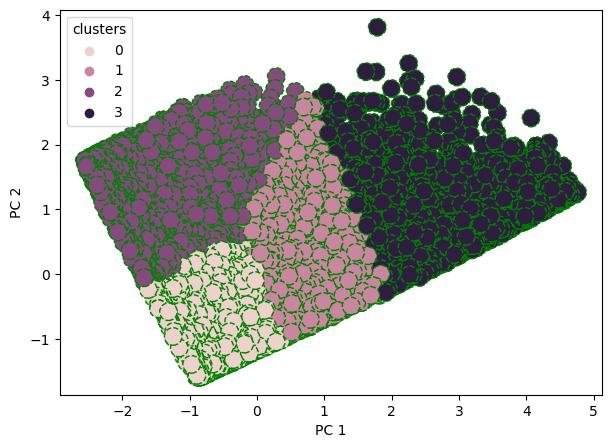

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    s=160,
    ax=ax
)

### Analysis

0. customer who need attention
1. high potential customer
2. lost customer (churn)
3. loyal customer

another insight:

1. pada eksperimen yang dilakukan saya mendapatkan bahwa rata-rata customer yg melakukan book flight terakhir (recency) sebanyak 167 (bulan), memiliki rata-rata frekuensi penerbangan sebesar 8.8 kali, dan menghabiskan rata rata jarak penerbangan (monetery) sebanyak 12517.63. Namun pada data ini ditemukan median pada recency sebesar 114 (bulan), frekuensi sebesar 6, dan monetery sebesar 9319.

2. pada cluster 2 bisa dipastikan mereka adalah customer-customer yang sudah churn dilihat dari rata-rata terakhir mereka melakukan book, 412 bulan (34 tahun, 4 bulan).

3. pada cluster 0 adalah costumer yang hanya ingin beberapa kali melakukan book tiket ini bisa jadi kemungkinan customer-customer yang hanya tertarik pada diskon, maka untuk menarik kostumer pada cluster ini bisa dilakukan beberapa diskon/point diskon yang menarik.

4. pada cluster 1 adalah customer yang memiliki potensi besar karena memliki tingkat recency yang rendah namun memiliki frekuensi dan tingkat monatery tinggi. Kita bisa melakukan campaign reward untukmendorong frekuensi cluster ini.

5. pada cluster 3 adalah loyal customer yang memiliki recency rendah tapi memiliki tingkat frekuensi dan monetary tinggi.